In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne
from BrainEmbeddingPhase2.B2BNet.cluster_scoring import *
from BrainEmbeddingPhase2.B2BNet.cluster_scoring_utility import *

In [2]:
prob_matrices_results = get_prob_matrices(is_gauss='norm')

 85%|████████▌ | 184/216 [00:00<00:00, 917.81it/s]

is testing:False


100%|██████████| 216/216 [00:00<00:00, 911.73it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [3]:
diver_x_set_g1cent, \
        diver_x_set_g2cent = prob_matrices_results[-2:]

In [4]:
import pandas as pd

In [5]:
a1a3_clusters = prob_matrices_results[4]
typical_clusters = prob_matrices_results[5]
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)

In [6]:

list_cluster_label = np.zeros(172)
for i in range(172):
    if i < 88:
        for cluster_idx in range(len_a1a3_clusters):
            if i in a1a3_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx
    if i >= 88:
        for cluster_idx in range(len_typical_clusters):
            if i-88 in typical_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx +  len_a1a3_clusters 
                    
    



In [7]:
df_b_cents = pd.DataFrame(np.concatenate([diver_x_set_g1cent,diver_x_set_g2cent], axis=1))

In [8]:
df_list_cluster_label = pd.DataFrame(list_cluster_label)
df_b_cents_with_label = pd.concat([df_b_cents, df_list_cluster_label],axis=1) 

In [9]:
a1a3_argmin = np.argmin (df_b_cents.values[:, :len_a1a3_clusters], axis=1)
typical_argmin = np.argmin (df_b_cents.values[:, len_a1a3_clusters:], axis=1)+len_a1a3_clusters

In [10]:
universal_argmin = np.argmin (df_b_cents.values, axis=1)

In [11]:
list_argmin=np.concatenate([a1a3_argmin.reshape(-1,1),typical_argmin.reshape(-1,1)],axis=1)

In [12]:
list_argmin_ = np.concatenate([list_argmin, universal_argmin.reshape(-1,1)], axis=1)

In [13]:
df_list_argmin_ = pd.DataFrame(list_argmin_ )

In [14]:
df_b_cents_with_label_and_argmin_= pd.concat([df_b_cents_with_label, df_list_argmin_], axis=1)

In [15]:
universal_argmin

array([6, 9, 3, 9, 9, 9, 4, 9, 5, 2, 7, 3, 1, 6, 6, 9, 2, 7, 1, 2, 8, 2,
       9, 3, 2, 1, 2, 3, 3, 5, 2, 1, 0, 4, 9, 9, 0, 3, 3, 5, 7, 9, 3, 6,
       1, 4, 5, 1, 5, 9, 2, 7, 7, 0, 1, 3, 2, 2, 9, 1, 6, 3, 5, 3, 9, 4,
       2, 9, 1, 4, 9, 4, 9, 6, 5, 3, 1, 3, 3, 6, 4, 3, 8, 1, 1, 2, 3, 0,
       1, 9, 5, 9, 6, 5, 1, 7, 9, 7, 9, 4, 9, 9, 9, 5, 9, 4, 6, 9, 8, 7,
       3, 9, 3, 9, 5, 3, 6, 7, 6, 5, 5, 9, 1, 1, 6, 6, 6, 5, 1, 3, 4, 8,
       1, 9, 9, 6, 9, 2, 6, 5, 7, 7, 1, 5, 9, 5, 8, 5, 9, 8, 3, 9, 9, 6,
       9, 7, 3, 6, 5, 4, 3, 2, 5, 1, 4, 2, 8, 0, 9, 9, 9, 8])

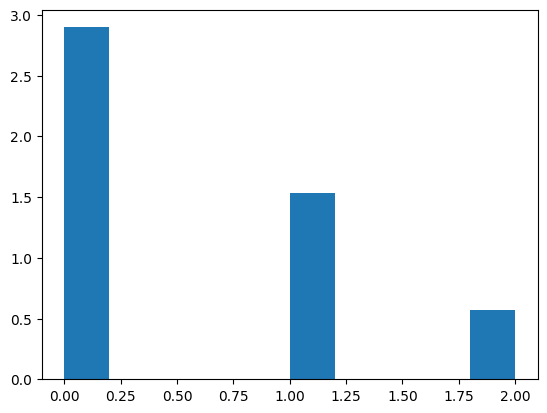

In [16]:
hist_smallest = []
for i in range(88):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[:88],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[:88][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()



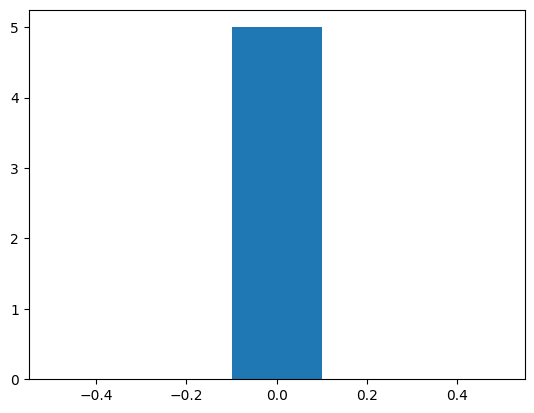

In [17]:
hist_smallest = []
sorted_diver_a1a3_cents  = np.argsort(df_b_cents.values[:88,:5],axis=1)
a1a3_labels_list = df_list_cluster_label.values.reshape(-1)[:88]
for i in range(88):
    hist_smallest.append(int(np.where(sorted_diver_a1a3_cents[i]  ==  a1a3_labels_list[i]) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

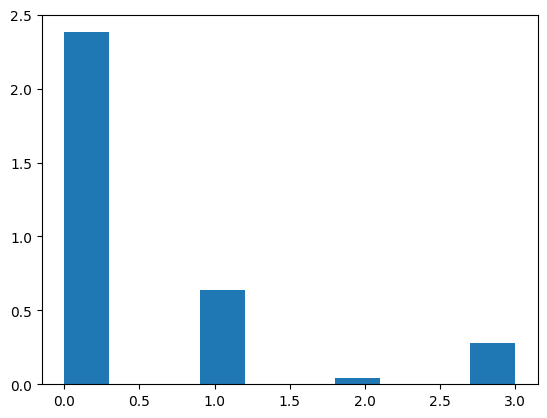

In [18]:
hist_smallest = []
for i in range(84):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[88:],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[88:][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()

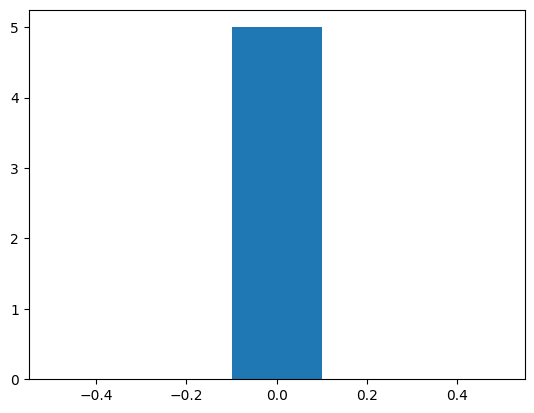

In [19]:
hist_smallest = []
sorted_diver_typical_cents  = np.argsort(df_b_cents.values[88:,5:],axis=1)
typical_labels_list = df_list_cluster_label.values.reshape(-1)[88:]
for i in range(84):
    hist_smallest.append(int(np.where(sorted_diver_typical_cents[i]  ==  typical_labels_list[i]-5) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [20]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

df_b_cents_with_label_and_argmin_.to_excel(prefix+experiment_path +"divergence_from_hub_centroids_with_cluster_label00904.xlsx")

In [20]:
a1a3_g1cent_params, a1a3_g2cent_params, typical_g1cent_params, typical_g2cent_params = prob_matrices_results[-6:-2]

In [21]:
print(f"a1a3_clusters_to_a1a3_groups: \n {a1a3_g1cent_params} \n"
      f"a1a3_clusters_to_typical_groups: \n {a1a3_g2cent_params} \n" 
      f"typical_clusters_to_a1a3_groups: \n {typical_g1cent_params}\n"
      f"typical_clusters_to_typical_groups: \n {typical_g2cent_params}")

a1a3_clusters_to_a1a3_groups: 
 [[(4.381499650864382, 2.933017613890082), (6.603439602985424, 2.525218792911147), (5.07275063049231, 2.635374898384427), (5.184973952227193, 2.533028695275575), (5.119887327095003, 2.6153711406393567)], [(9.787165383958365, 3.677255692977538), (6.593595035574804, 3.2430145871432234), (11.37696651659602, 3.6661070744669746), (7.592909312922831, 3.341433905078715), (7.520935632296406, 3.153202876997794)], [(5.021890925416422, 2.3321464521903756), (8.40251948652235, 2.0884273759270164), (4.459749064986883, 2.5561739733579643), (6.672907981244599, 2.1061601523295885), (6.322052250317945, 2.2069828839040535)], [(7.7117126337360915, 3.2417688116424017), (7.4801251249665, 3.1247160337768167), (8.542722381788092, 3.0643216718141475), (6.703020598180375, 3.3923973202181004), (7.131004372849395, 3.241886490948518)], [(6.628733579708841, 3.1279710356688364), (6.394132256510893, 2.798390302630779), (7.84224658981153, 2.799588934703354), (5.83405233598657, 3.02088655

In [18]:
matrix_for_scoring, sample_weight= generate_prob_matrix_with_cluster_labels(
        *prob_matrices_results[:8], len_a1a3_group=88)

In [19]:
cate_reg_list, cate_reg_predict_list, \
cluster_reg_list, cluster_reg_predict_list = cluster_scoring_with_two_labels(matrix_for_scoring, sample_weight)
cate_predicted_score = np.array(cate_reg_predict_list).T
cluster_predicted_score = np.array(cluster_reg_predict_list).T

In [20]:
cate_input_score_in_a1a3 = cate_predicted_score[:,:len_a1a3_clusters]
cate_input_score_in_typical = cate_predicted_score[:,len_a1a3_clusters:]

In [21]:
cluster_input_score_in_a1a3 = cluster_predicted_score[:,:len_a1a3_clusters]
cluster_input_score_in_typical = cluster_predicted_score[:,len_a1a3_clusters:]

In [22]:
input_score_in_a1a3 = np.concatenate([cate_input_score_in_a1a3, cluster_input_score_in_a1a3], axis=1)
input_score_in_typical = np.concatenate([cate_input_score_in_typical, cluster_input_score_in_typical], axis=1)

In [23]:
np.shape(input_score_in_a1a3)

(172, 10)

In [24]:
df_cate_predicted_score= pd.DataFrame(cate_predicted_score)
df_cluster_predicted_score= pd.DataFrame(cluster_predicted_score)

In [25]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
len_samples = 172
with pd.ExcelWriter(
        prefix + experiment_path + "norm_Probability_matrix+#cluster_label+#category_label+predicted0905_v3.xlsx") as writer:
    for i in range(len_samples):
        this_table = \
            np.concatenate([matrix_for_scoring[i,:,:], cate_predicted_score[i].reshape(-1,1), cluster_predicted_score[i].reshape(-1,1)], axis=1)
        df_this_table=pd.DataFrame(this_table)
        sheet_str = f"No.{i}"
        df_this_table.to_excel(writer, sheet_name=sheet_str)

In [26]:

df_cate_cluster_predcit = pd.concat([df_cate_predicted_score, df_cluster_predicted_score], axis = 1)

In [13]:
result = regression(np.array(input_score_in_typical),np.array(input_score_in_a1a3), 
                              len_a1a3_group=88, len_typical_group=84,
                              train_type="none")

In [14]:
print(result)

{'trained_clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 'accurate_count': 114, 'adhd_accurate_count': 60, 'typical_accurate_count': 54, 'predict_y': array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.

In [17]:
test_prob_matrices_results = get_prob_matrices(is_gauss='norm',is_testing=True)

 81%|████████  | 174/216 [00:00<00:00, 847.25it/s]

is testing:True


100%|██████████| 216/216 [00:00<00:00, 871.30it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [18]:
test_matrix_for_scoring, test_sample_weight= generate_prob_matrix_with_cluster_labels(
        *test_prob_matrices_results[:8],len_a1a3_group=88)

In [19]:
test_cate_reg_predict_list, test_cluster_reg_predict_list = \
    cluster_scoring_with_two_labels(test_matrix_for_scoring, sample_weight,\
                                    is_training=False, 
                                    trained_cate_reg_list=cate_reg_list,
                                    trained_cluster_reg_list=cluster_reg_list)
test_cate_predicted_score = np.array(test_cate_reg_predict_list).T
test_cluster_predicted_score = np.array(test_cluster_reg_predict_list).T

In [17]:
test_cate_input_score_in_a1a3 = test_cate_predicted_score[:,:len_a1a3_clusters]
test_cate_input_score_in_typical = test_cate_predicted_score[:,len_a1a3_clusters:]
test_cluster_input_score_in_a1a3 = test_cluster_predicted_score[:,:len_a1a3_clusters]
test_cluster_input_score_in_typical = test_cluster_predicted_score[:,len_a1a3_clusters:]

In [18]:
test_input_score_in_a1a3 = np.concatenate([test_cate_input_score_in_a1a3, test_cluster_input_score_in_a1a3], axis=1)
test_input_score_in_typical = np.concatenate([test_cate_input_score_in_typical, test_cluster_input_score_in_typical], axis=1)

In [19]:
test_result = regression(np.array(test_input_score_in_a1a3), np.array(test_input_score_in_typical),
                              len_a1a3_group=88, len_typical_group=84,
                              train_type="none")

In [20]:
print(test_result)

{'trained_clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 'accurate_count': 120, 'adhd_accurate_count': 64, 'typical_accurate_count': 56, 'predict_y': array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.

In [20]:
np.shape(matrix_for_scoring)

(172, 10, 12)

In [13]:
np.shape(sample_weight)

(172, 10)

In [17]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
with pd.ExcelWriter(
        prefix + experiment_path + "norm_Probability_matrix_by_cluster+#cluster_label+#category_label+predicted0905_weight.xlsx") as writer:
    for i in range(len_a1a3_clusters+len_typical_clusters):
        matrix_by_cluster= np.concatenate([matrix_for_scoring[:,i,:],
                                           np.array(cate_reg_predict_list)[i,:].reshape(-1,1),
                                           np.array(cluster_reg_predict_list)[i,:].reshape(-1,1),
                                           sample_weight[:,i].reshape(-1,1),
                                          ],axis=1)
        df_this_table = pd.DataFrame(matrix_by_cluster)
        sheet_str = f"cluster.{i}"
        df_this_table.to_excel(writer, sheet_name=sheet_str) 
        

In [15]:
df_sample_weight = pd.DataFrame(sample_weight)

In [16]:
df_sample_weight.values[list(a1a3_clusters[0])]

array([[160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.]])

In [32]:
for i in range(10):
    print(f"w for cluster{i} \n"
          f"{cluster_reg_list[i].coef_ }\n"
          f"b for cluster{i} \n"
          f"{cluster_reg_list[i].intercept_}"
         )

w for cluster0 
[ -7.84177177   1.38060448  24.38118989   3.87378318 -18.99726179
  -6.77535798  -8.34128182   2.30350183   6.87095208   7.56088164]
b for cluster0 
-0.5224349905032232
w for cluster1 
[-23.30198227 -18.2050149   19.0707947   21.47752847  32.03363794
  11.94570463   8.55138949   5.15992114 -17.45319887 -36.76122946]
b for cluster1 
-0.43893863192062943
w for cluster2 
[  0.07963437  -1.81040114   1.14854018  25.8442104  -16.47679953
  11.11659559  -2.63181727   4.07745862 -11.86920275   0.5862021 ]
b for cluster2 
-0.8795082509725527
w for cluster3 
[  0.56169011   4.63857916   9.37567214 -27.18027321   3.4532041
   5.59832853   2.10176996   7.93099375  -6.6946556    4.855624  ]
b for cluster3 
-0.23809958112079183
w for cluster4 
[-19.42633971   2.00008462  27.43357164 -12.71618856  -9.39603801
 -14.8385253    0.57063978   4.43967606  -5.65417284  27.61037243]
b for cluster4 
0.027233811167243882
w for cluster5 
[-0.73340638 -0.56791373  1.51790576  0.06377672 -1.55965